In [335]:
import pandas as pd

# 그래프, 한글 설정
# 출처 : https://wikidocs.net/4767
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# EUC-KR 은 KS X 1001와 KS X 1003을 사용하는 8비트 문자 인코딩, EUC의 일종이며 대표적인 한글 완성형 인코딩임
# 해당 파일을 utf-8로 설정 시 오류가 나서 euc-kr로 설정
shopping = pd.read_csv('shopping.csv', encoding = 'euc-kr')
notshopping = pd.read_csv('notshopping.csv')

# 필요한 컬럼들만 선택
#shopping = raw_shopping[['ID', 'GENDER', 'AGE_PRD', 'DE_DT', 'DE_HR', 'BIZ_UNIT.x', 'PD_S_C', 'PD_H_NM', 'PD_M_NM', 'PD_S_NM', 'BUY_CT', 'BUY_AM']]
#notshopping = raw_notshopping[['ID', 'GENDER', 'AGE_PRD', 'BIZ_UNIT', 'CRYM', 'U_AM', 'U_CT']]

In [336]:
# shopping 자료의 년월일 별로 적혀있던 날을 년월로 바꿈
for i in range(1,13):
    month = int('2015{0:02d}'.format(i))
    for j in range(1,32):
        day = int('2015{0:02d}{1:02d}'.format(i,j))
        shopping['DE_DT'].replace({day:month}, inplace=True)

# 2014년 12월 자료는 필요없으니 삭제
for i in range(20141229, 20141232):
    shopping = shopping.drop(shopping[shopping.DE_DT == i].index)

In [337]:
shopping['AGE_PRD'] = shopping['AGE_PRD'].replace({'20PRD':'20대', 
                                                   '30PRD':'30대', 
                                                   '40PRD':'40대', 
                                                   '50PRD':'50대', 
                                                   '60PRD':'60대'})

notshopping['AGE_PRD'] = notshopping['AGE_PRD'].replace({'20PRD':'20대',
                                                         '30PRD':'30대', 
                                                         '40PRD':'40대', 
                                                         '50PRD':'50대', 
                                                         '60PRD':'60대'})

In [338]:
#(A01:백화점, A02:대형마트, A03:슈퍼마켓, A04:편의점, A05:드러그스토어)
shopping['BIZ_UNIT.x'] = shopping['BIZ_UNIT.x'].replace({'A01':'백화점', 
                                                         'A02':'대형마트', 
                                                         'A03':'슈퍼마켓', 
                                                         'A04':'편의점', 
                                                         'A05':'드러그스토어'})

#(B01:호텔, B02:여행사, B03:면세점,C01:영화관, C02:테마파크, C03:야구관람, D01:패스트푸드, D02:패밀리레스토랑, D03:카페)
notshopping['BIZ_UNIT'] = notshopping['BIZ_UNIT'].replace({'B01':'호텔', 
                                                           'B02':'여행사', 
                                                           'B03':'면세점', 
                                                           'C01':'영화관',
                                                           'C02':'테마파크', 
                                                           'C03':'야구관람', 
                                                           'D01':'패스트푸드', 
                                                           'D02':'패밀리레스토랑', 
                                                           'D03':'카페'}) 

In [339]:
name = {'GENDER':u'성별',
        'AGE_PRD':u'연령대',
        'HOM_PST_NO':u'거주지', 
        'DE_DT':u'이용월',
        'CRYM':u'이용월',
        'DE_HR':u'구매시간',
        'BR_C':u'점포코드', 
        'RCT_NO':u'영수증번호', 
        'BIZ_UNIT.x':u'업종',
        'BIZ_UNIT':u'업종',
        'PD_S_C':u'상품소분류코드', 
        'PD_H_NM':u'대분류명', 
        'PD_M_NM':u'중분류명', 
        'PD_S_NM':u'소분류명', 
        'BUY_CT':u'구매수량', 
        'U_CT':u'이용건수', 
        'BUY_AM':u'구매금액', 
        'U_AM':u'이용금액'}

In [340]:
shopping = shopping.rename(columns = name)

notshopping = notshopping.rename(columns = name)

In [342]:
## 성별로 구분

# 남자만
male = shopping[shopping[u'성별'] == 1]
n_male = notshopping[notshopping[u'성별'] == 1]

#여자만
female = shopping[shopping[u'성별'] == 2]
n_female = notshopping[notshopping[u'성별'] == 2]

In [343]:
#성별간 나이대로 구분
#남자 20대~60대
M_20 = male[male[u'연령대'] == '20대']
M_30 = male[male[u'연령대'] == '30대']
M_40 = male[male[u'연령대'] == '40대']
M_50 = male[male[u'연령대'] == '50대']
M_60 = male[male[u'연령대'] == '60대']

n_M_20 = n_male[n_male[u'연령대'] == '20대']
n_M_30 = n_male[n_male[u'연령대'] == '30대']
n_M_40 = n_male[n_male[u'연령대'] == '40대']
n_M_50 = n_male[n_male[u'연령대'] == '50대']
n_M_60 = n_male[n_male[u'연령대'] == '60대']

In [344]:
#여자 20대~60대
F_20 = female[female[u'연령대'] == '20대']
F_30 = female[female[u'연령대'] == '30대']
F_40 = female[female[u'연령대'] == '40대']
F_50 = female[female[u'연령대'] == '50대']
F_60 = female[female[u'연령대'] == '60대']

n_F_20 = n_female[n_female[u'연령대'] == '20대']
n_F_30 = n_female[n_female[u'연령대'] == '30대']
n_F_40 = n_female[n_female[u'연령대'] == '40대']
n_F_50 = n_female[n_female[u'연령대'] == '50대']
n_F_60 = n_female[n_female[u'연령대'] == '60대']

In [345]:
# 전체 연령별
total_20 = shopping[shopping[u'연령대'] == '20대']
total_30 = shopping[shopping[u'연령대'] == '30대']
total_40 = shopping[shopping[u'연령대'] == '40대']
total_50 = shopping[shopping[u'연령대'] == '50대']
total_60 = shopping[shopping[u'연령대'] == '60대']

In [346]:
n_total_20 = notshopping[notshopping[u'연령대'] == '20대']
n_total_30 = notshopping[notshopping[u'연령대'] == '30대']
n_total_40 = notshopping[notshopping[u'연령대'] == '40대']
n_total_50 = notshopping[notshopping[u'연령대'] == '50대']
n_total_60 = notshopping[notshopping[u'연령대'] == '60대']

In [347]:
# gender = 성별 선택, group = 어느 기준으로 그룹화할건지, criteria = 어느 요소기준으로 정렬할건지
def group_sum(gender, group, criteria):
    result = gender.groupby(group).sum().sort_values(by=criteria, ascending=False)
    return result[criteria]

In [349]:
### 총판매금액
## shopping
# 남자 나이대별 총구매액
group_sum(male, u'연령대', u'구매금액')

연령대
50대    10211236284
40대     7995915596
30대     7349166721
60대     5798992463
20대     1833708455
Name: 구매금액, dtype: int64

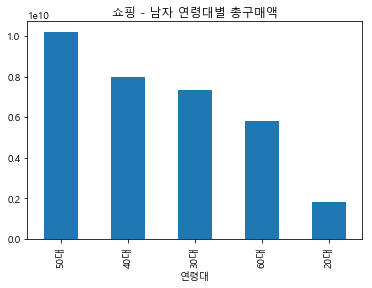

In [489]:
# 남자 나이대별 총구매액
group_sum(male, u'연령대', u'구매금액').plot(kind='bar')
plt.title(u'쇼핑 - 남자 연령대별 총구매액')

In [351]:
# 여자 나이대별 총구매액
group_sum(female, u'연령대', u'구매금액')

연령대
50대    18638629243
40대    13888980259
60대    11463308188
30대    10652109714
20대     2416553407
Name: 구매금액, dtype: int64

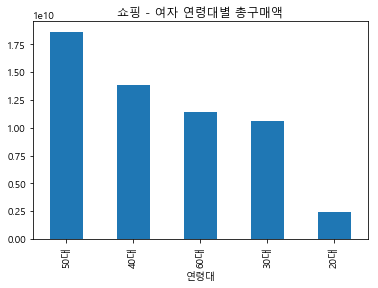

In [490]:
# 여자 나이대별 총구매액
group_sum(female, u'연령대', u'구매금액').plot(kind='bar')
plt.title(u'쇼핑 - 여자 연령대별 총구매액')

In [353]:
# 남자+여자 나이대별 총구매액
group_sum(shopping, u'연령대', u'구매금액')

연령대
50대    28849865527
40대    21884895855
30대    18001276435
60대    17262300651
20대     4250261862
Name: 구매금액, dtype: int64

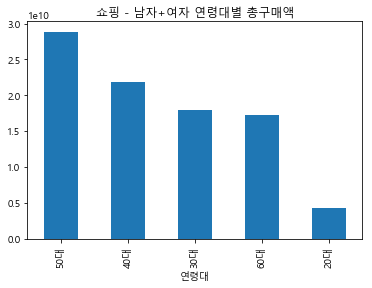

In [491]:
# 남자+여자 나이대별 총구매액
group_sum(shopping, u'연령대', u'구매금액').plot(kind='bar')
plt.title(u'쇼핑 - 남자+여자 연령대별 총구매액')

In [355]:
## notshopping
# 남자 나이대별 총구매액
group_sum(n_male, u'연령대', u'이용금액')

연령대
40대    1487373225
50대    1196929394
30대    1116330497
60대     987416781
20대     393339114
Name: 이용금액, dtype: int64

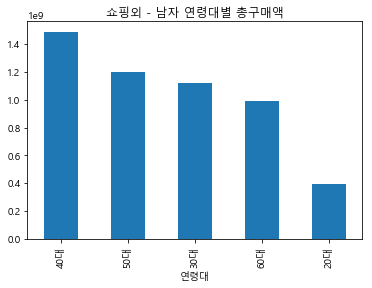

In [492]:
## notshopping
# 남자 나이대별 총구매액
group_sum(n_male, u'연령대', u'이용금액').plot(kind='bar')
plt.title(u'쇼핑외 - 남자 연령대별 총구매액')

In [357]:
# 여자 나이대별 총구매액
group_sum(n_female, u'연령대', u'이용금액')

연령대
50대    1665142526
30대    1654876520
60대    1589303536
40대    1578091071
20대     506775558
Name: 이용금액, dtype: int64

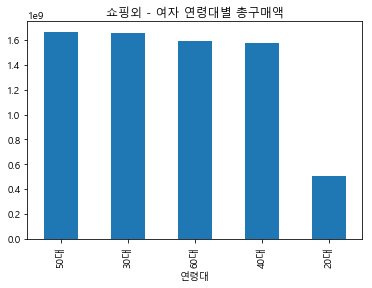

In [493]:
# 여자 나이대별 총구매액
group_sum(n_female, u'연령대', u'이용금액').plot(kind='bar')
plt.title(u'쇼핑외 - 여자 연령대별 총구매액')

In [495]:
# 남자+여자 나이대별 총구매액
group_sum(notshopping, u'연령대', u'이용금액')

연령대
40대    3065464296
50대    2862071920
30대    2771207017
60대    2576720317
20대     900114672
Name: 이용금액, dtype: int64

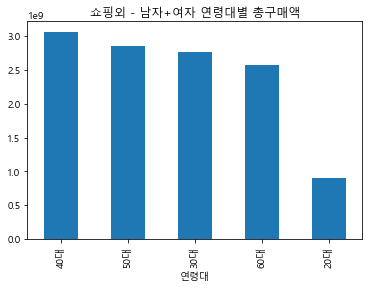

In [496]:
# 남자+여자 나이대별 총구매액
group_sum(notshopping, u'연령대', u'이용금액').plot(kind='bar')
plt.title(u'쇼핑외 - 남자+여자 연령대별 총구매액')

In [361]:
### 어떤 품목이 많이 팔렸나? (상위 20개)
## shopping만
# 남자 모든연령 많이 팔린 품목
group_sum(male, u'소분류명', u'구매수량').iloc[:10]

소분류명
NB돼지고기         2809233
기능성웰빙돼지고기      2403524
호주산목초비육        1193990
감자              664725
호주산곡물비육         648151
노지감귤            526669
한우정육            463862
미국산초이스등급소고기     446043
미국산냉동소고기        303184
국산꽃게            293688
Name: 구매수량, dtype: int64

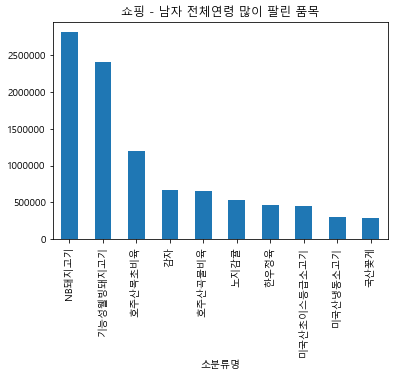

In [498]:
# 남자 모든연령 많이 팔린 품목
group_sum(male, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 남자 전체연령 많이 팔린 품목')

In [364]:
# 여자 모든연령 많이 팔린 품목
group_sum(female, u'소분류명', u'구매수량').iloc[:10]

소분류명
NB돼지고기         4173325
기능성웰빙돼지고기      4157723
호주산목초비육        2283451
호주산곡물비육        1072208
감자              998468
한우정육            805055
미국산냉동소고기        784319
미국산초이스등급소고기     764552
노지감귤            746352
국산꽃게            562635
Name: 구매수량, dtype: int64

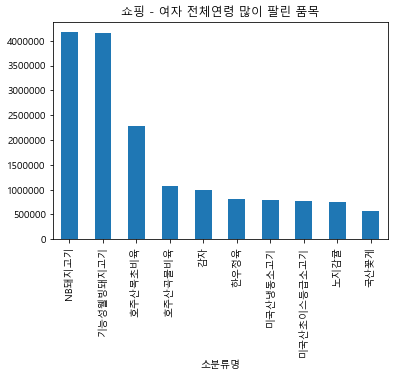

In [499]:
# 여자 모든연령 많이 팔린 품목
group_sum(female, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 여자 전체연령 많이 팔린 품목')

In [366]:
# 남자+여자 모든연령 많이 팔린 품목
group_sum(shopping, u'소분류명', u'구매수량').iloc[:10]

소분류명
NB돼지고기         6982558
기능성웰빙돼지고기      6561247
호주산목초비육        3477441
호주산곡물비육        1720359
감자             1663193
노지감귤           1273021
한우정육           1268917
미국산초이스등급소고기    1210595
미국산냉동소고기       1087503
국산꽃게            856323
Name: 구매수량, dtype: int64

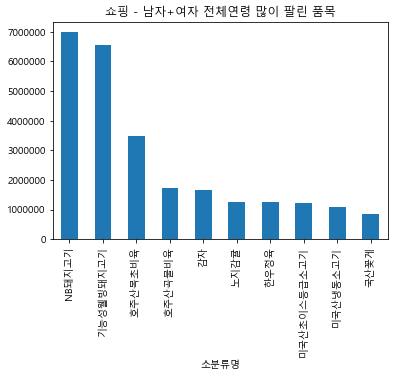

In [500]:
# 남자+여자 모든연령 많이 팔린 품목
group_sum(shopping, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 남자+여자 전체연령 많이 팔린 품목')

In [368]:
# 남자 연령별 많이 팔린 제품  -> 코드 다시 짜봐야할것같음..
#male.groupby(['AGE_PRD', 'PD_S_NM']).sum().sort_values(by=['AGE_PRD', 'BUY_CT'],ascending=False)
#group_sum(male, ['AGE_PRD', 'PD_S_NM'], ['AGE_PRD', 'BUY_CT'])

# 남자 나이대별 많이 팔린 품목
group_sum(M_20, u'소분류명', u'구매수량').iloc[:10]

소분류명
기능성웰빙돼지고기      137407
NB돼지고기         127052
미국산초이스등급소고기     36565
호주산곡물비육         33222
감자              30287
노지감귤            26033
호주산목초비육         21413
칠레청포도           15816
맥시코산돼지고기        15006
일반바나나           12629
Name: 구매수량, dtype: int64

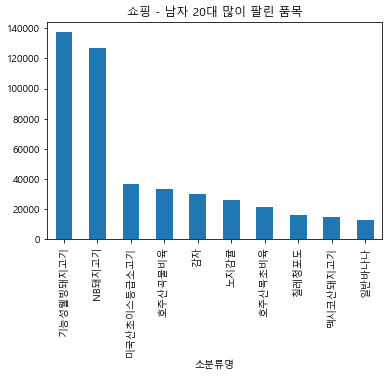

In [501]:
# 남자 연령별 많이 팔린 제품  -> 코드 다시 짜봐야할것같음..
#male.groupby(['AGE_PRD', 'PD_S_NM']).sum().sort_values(by=['AGE_PRD', 'BUY_CT'],ascending=False)
#group_sum(male, ['AGE_PRD', 'PD_S_NM'], ['AGE_PRD', 'BUY_CT'])

# 남자 나이대별 많이 팔린 품목
group_sum(M_20, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 남자 20대 많이 팔린 품목')

In [370]:
group_sum(M_30, u'소분류명', u'구매수량').iloc[:10]

소분류명
NB돼지고기         692832
기능성웰빙돼지고기      499022
호주산목초비육        239861
감자             194761
노지감귤           126966
호주산곡물비육        124472
미국산초이스등급소고기     81333
한우정육            80697
한우등심            68605
소양념육            62435
Name: 구매수량, dtype: int64

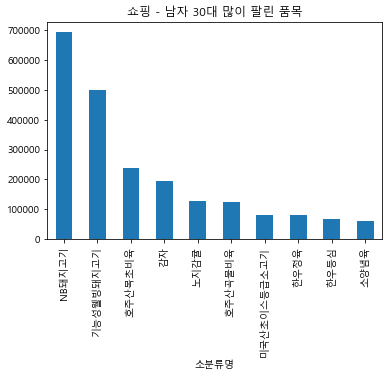

In [502]:
group_sum(M_30, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 남자 30대 많이 팔린 품목')

In [372]:
group_sum(M_40, u'소분류명', u'구매수량').iloc[:10]

소분류명
NB돼지고기         1062218
기능성웰빙돼지고기       680568
호주산목초비육         354123
호주산곡물비육         250161
감자              196704
한우정육            158705
노지감귤            133117
미국산초이스등급소고기     131660
한우등심            103698
칠레청포도            91639
Name: 구매수량, dtype: int64

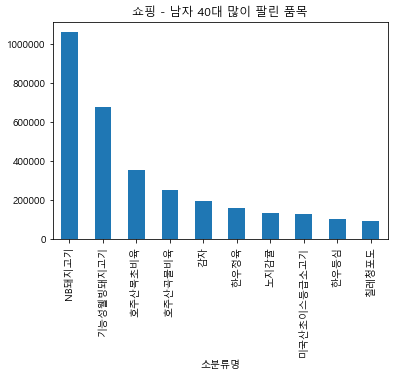

In [503]:
group_sum(M_40, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 남자 40대 많이 팔린 품목')

In [374]:
group_sum(M_50, u'소분류명', u'구매수량').iloc[:10]

소분류명
기능성웰빙돼지고기      728549
NB돼지고기         600983
호주산목초비육        324856
노지감귤           165074
호주산곡물비육        151504
감자             135775
미국산초이스등급소고기    127642
한우정육           121660
국산꽃게           100352
미국산냉동소고기        97032
Name: 구매수량, dtype: int64

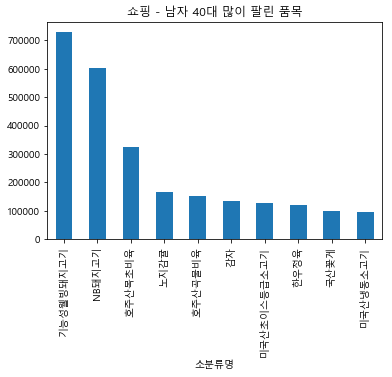

In [504]:
group_sum(M_50, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 남자 40대 많이 팔린 품목')

In [376]:
group_sum(M_60, u'소분류명', u'구매수량').iloc[:10]

소분류명
기능성웰빙돼지고기      357978
NB돼지고기         326148
호주산목초비육        253737
감자             107198
한우정육            91744
호주산곡물비육         88792
노지감귤            75479
미국산냉동소고기        72811
미국산초이스등급소고기     68843
연근              52700
Name: 구매수량, dtype: int64

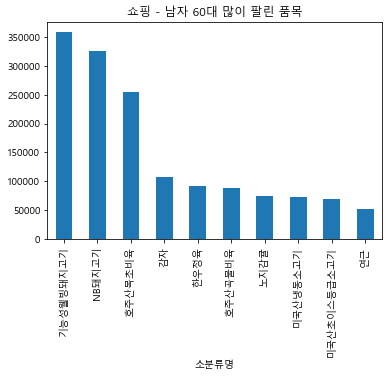

In [505]:
group_sum(M_60, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 남자 60대 많이 팔린 품목')

In [378]:
# 여자 나이대별 많이 팔린 품목
group_sum(F_20, u'소분류명', u'구매수량').iloc[:10]

소분류명
기능성웰빙돼지고기      252154
NB돼지고기         149748
감자              49388
호주산곡물비육         48826
노지감귤            31803
호주산목초비육         27903
일반바나나           25348
미국산초이스등급소고기     24597
국산꽃게            22651
칠레청포도           17564
Name: 구매수량, dtype: int64

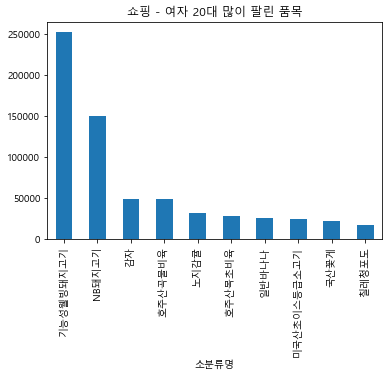

In [506]:
# 여자 나이대별 많이 팔린 품목
group_sum(F_20, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 여자 20대 많이 팔린 품목')

In [380]:
group_sum(F_30, u'소분류명', u'구매수량').iloc[:10]

소분류명
기능성웰빙돼지고기      775100
NB돼지고기         770989
호주산목초비육        345159
감자             208423
호주산곡물비육        165680
노지감귤           162247
칠레청포도          118132
한우정육           117817
미국산초이스등급소고기    113147
소양념육           106187
Name: 구매수량, dtype: int64

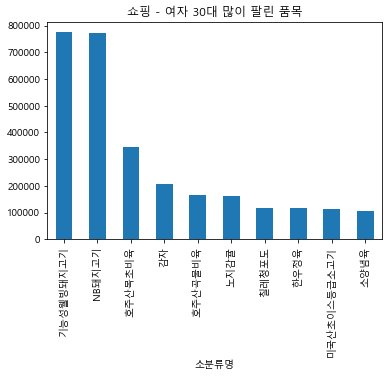

In [507]:
group_sum(F_30, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 여자 30대 많이 팔린 품목')

In [382]:
group_sum(F_40, u'소분류명', u'구매수량').iloc[:10]

소분류명
NB돼지고기         1368341
기능성웰빙돼지고기      1253649
호주산목초비육         529429
호주산곡물비육         302684
감자              282000
미국산초이스등급소고기     232850
한우정육            229035
미국산냉동소고기        200888
노지감귤            174315
국산꽃게            151892
Name: 구매수량, dtype: int64

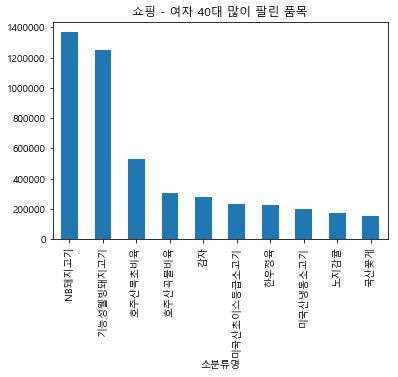

In [508]:
group_sum(F_40, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 여자 40대 많이 팔린 품목')

In [384]:
group_sum(F_50, u'소분류명', u'구매수량').iloc[:10]

소분류명
NB돼지고기         1355139
기능성웰빙돼지고기      1312101
호주산목초비육         775431
호주산곡물비육         326292
미국산냉동소고기        307188
감자              294497
노지감귤            270798
한우정육            261299
미국산초이스등급소고기     253049
국산꽃게            195184
Name: 구매수량, dtype: int64

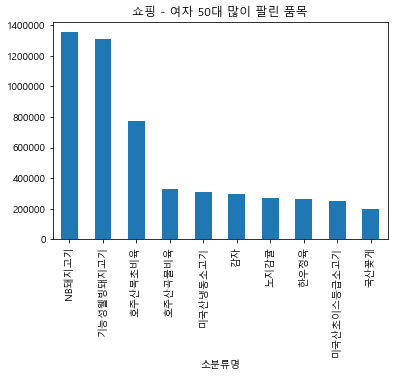

In [509]:
group_sum(F_50, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 여자 50대 많이 팔린 품목')

In [386]:
group_sum(F_60, u'소분류명', u'구매수량').iloc[:10]

소분류명
호주산목초비육        605529
기능성웰빙돼지고기      564719
NB돼지고기         529108
호주산곡물비육        228726
미국산냉동소고기       212300
한우정육           181992
감자             164160
미국산초이스등급소고기    140909
국산꽃게           114877
노지감귤           107189
Name: 구매수량, dtype: int64

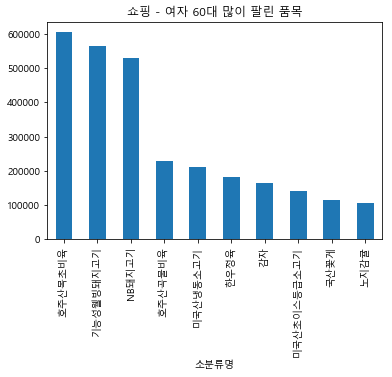

In [510]:
group_sum(F_60, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 여자 60대 많이 팔린 품목')

In [388]:
# 남자+여자 나이대별 많이 팔린 품목
group_sum(total_20, u'소분류명', u'구매수량').iloc[:10]

소분류명
기능성웰빙돼지고기      389561
NB돼지고기         276800
호주산곡물비육         82048
감자              79675
미국산초이스등급소고기     61162
노지감귤            57836
호주산목초비육         49316
일반바나나           37977
국산꽃게            33738
칠레청포도           33380
Name: 구매수량, dtype: int64

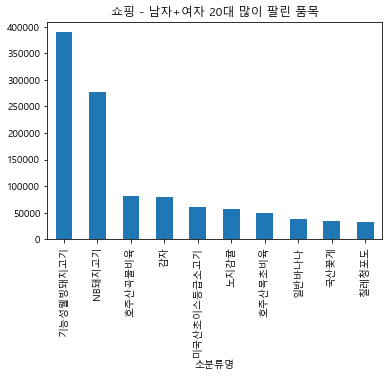

In [511]:
# 남자+여자 나이대별 많이 팔린 품목
group_sum(total_20, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 남자+여자 20대 많이 팔린 품목')

In [390]:
group_sum(total_30, u'소분류명', u'구매수량').iloc[:10]

소분류명
NB돼지고기         1463821
기능성웰빙돼지고기      1274122
호주산목초비육         585020
감자              403184
호주산곡물비육         290152
노지감귤            289213
한우정육            198514
미국산초이스등급소고기     194480
칠레청포도           169147
소양념육            168622
Name: 구매수량, dtype: int64

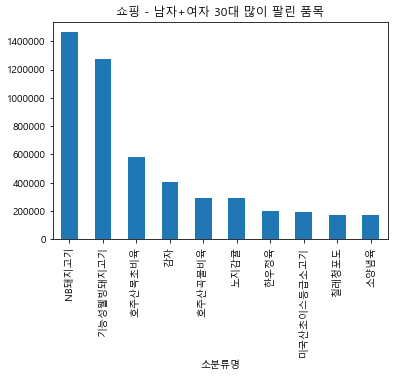

In [512]:
group_sum(total_30, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 남자+여자 30대 많이 팔린 품목')

In [392]:
group_sum(total_40, u'소분류명', u'구매수량').iloc[:10]

소분류명
NB돼지고기         2430559
기능성웰빙돼지고기      1934217
호주산목초비육         883552
호주산곡물비육         552845
감자              478704
한우정육            387740
미국산초이스등급소고기     364510
노지감귤            307432
미국산냉동소고기        283233
국산꽃게            235955
Name: 구매수량, dtype: int64

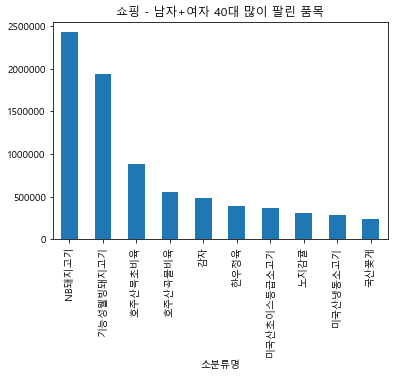

In [513]:
group_sum(total_40, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 남자+여자 40대 많이 팔린 품목')

In [394]:
group_sum(total_50, u'소분류명', u'구매수량').iloc[:10]

소분류명
기능성웰빙돼지고기      2040650
NB돼지고기         1956122
호주산목초비육        1100287
호주산곡물비육         477796
노지감귤            435872
감자              430272
미국산냉동소고기        404220
한우정육            382959
미국산초이스등급소고기     380691
국산꽃게            295536
Name: 구매수량, dtype: int64

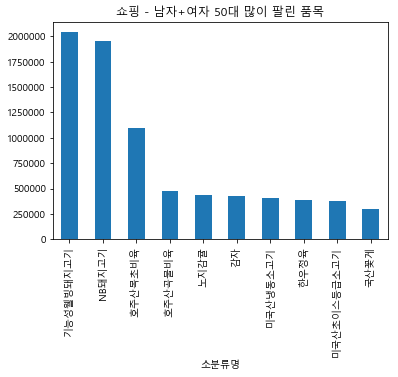

In [514]:
group_sum(total_50, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 남자+여자 50대 많이 팔린 품목')

In [396]:
group_sum(total_60, u'소분류명', u'구매수량').iloc[:10]

소분류명
기능성웰빙돼지고기      922697
호주산목초비육        859266
NB돼지고기         855256
호주산곡물비육        317518
미국산냉동소고기       285111
한우정육           273736
감자             271358
미국산초이스등급소고기    209752
노지감귤           182668
국산꽃게           157019
Name: 구매수량, dtype: int64

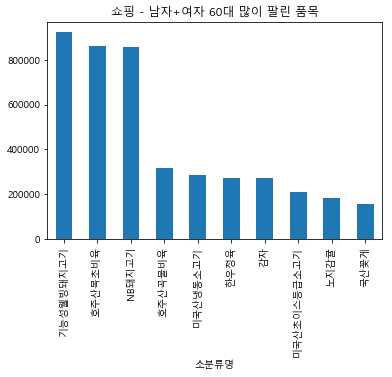

In [515]:
group_sum(total_60, u'소분류명', u'구매수량').iloc[:10].plot(kind='bar')
plt.title(u'쇼핑 - 남자+여자 60대 많이 팔린 품목')

In [516]:
### 어떤 업종에서 많이 팔렸나 (shopping, notshopping)

# gender = 성별 선택, group = 어느 기준으로 그룹화할건지, criteria = 어느 요소기준으로 정렬할건지
#def group_count(gender, group, criteria):
#    result = gender.groupby(group).count().sort_values(by=criteria, ascending=False)
#    return result[criteria]

def count(gender_age, criteria):
    return gender_age[criteria].value_counts()

In [517]:
## shopping
# 남자 모든연령 많이 이용한 업종
count(male, u'업종')

대형마트      645301
백화점       300497
슈퍼마켓      249087
편의점       107620
드러그스토어      5829
Name: 업종, dtype: int64

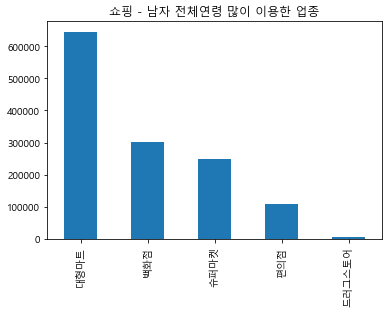

In [518]:
## shopping
# 남자 모든연령 많이 이용한 업종
count(male, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 남자 전체연령 많이 이용한 업종')

In [402]:
# 여자 모든연령 많이 이용한 업종
count(female, u'업종')

대형마트      1065672
백화점        632216
슈퍼마켓       505201
편의점         97088
드러그스토어      16452
Name: 업종, dtype: int64

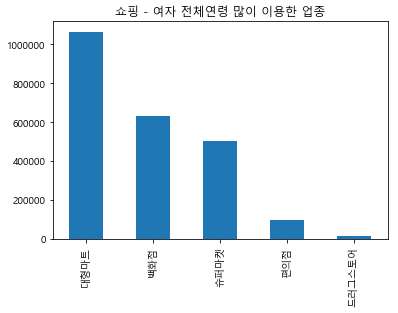

In [519]:
# 여자 모든연령 많이 이용한 업종
count(female, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 여자 전체연령 많이 이용한 업종')

In [404]:
# 남자+여자 모든연령 많이 이용한 업종
count(shopping, u'업종')

대형마트      1710973
백화점        932713
슈퍼마켓       754288
편의점        204708
드러그스토어      22281
Name: 업종, dtype: int64

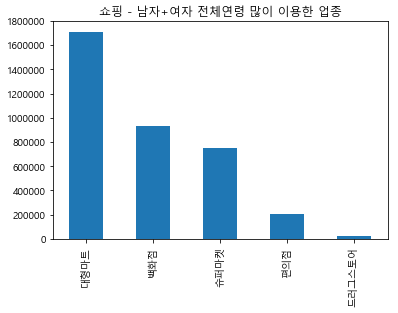

In [520]:
# 남자+여자 모든연령 많이 이용한 업종
count(shopping, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 남자+여자 전체연령 많이 이용한 업종')

In [406]:
## notshopping
# 남자 모든연령 많이 이용한 업종
count(n_male, u'업종')

영화관        24804
패스트푸드      16976
카페         15334
면세점         7316
테마파크        4928
호텔          1963
패밀리레스토랑     1290
야구관람         299
여행사           25
Name: 업종, dtype: int64

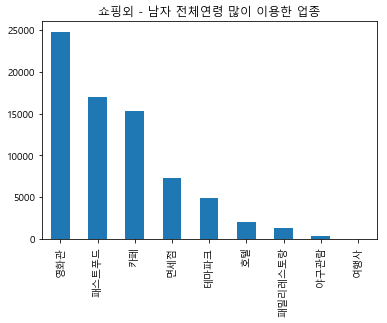

In [521]:
## notshopping
# 남자 모든연령 많이 이용한 업종
count(n_male, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 남자 전체연령 많이 이용한 업종')

In [408]:
# 여자 모든연령 많이 이용한 업종
count(n_female, u'업종')

영화관        35235
패스트푸드      25781
카페         22857
면세점        10319
테마파크        7668
패밀리레스토랑     1822
호텔          1794
야구관람         204
여행사           44
Name: 업종, dtype: int64

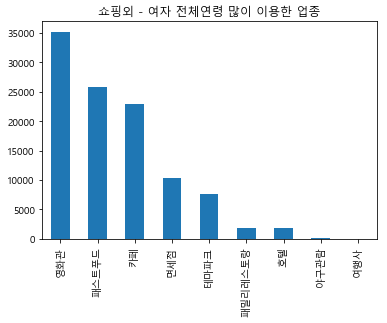

In [522]:
# 여자 모든연령 많이 이용한 업종
count(n_female, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 여자 전체연령 많이 이용한 업종')

In [410]:
# 남자+여자 모든연령 많이 이용한 업종
count(notshopping, u'업종')

영화관        60039
패스트푸드      42757
카페         38191
면세점        17635
테마파크       12596
호텔          3757
패밀리레스토랑     3112
야구관람         503
여행사           69
Name: 업종, dtype: int64

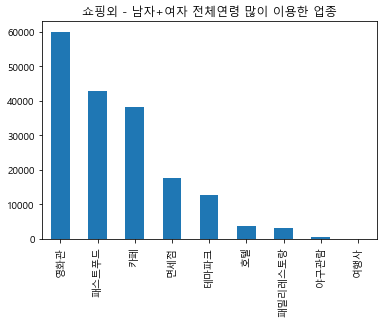

In [523]:
# 남자+여자 모든연령 많이 이용한 업종
count(notshopping, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 남자+여자 전체연령 많이 이용한 업종')

In [548]:
# 남자 연령대별로 많이 이용한 업종
count(M_20, u'업종')

대형마트      31994
편의점       18743
백화점       18243
슈퍼마켓      10892
드러그스토어     1207
Name: 업종, dtype: int64

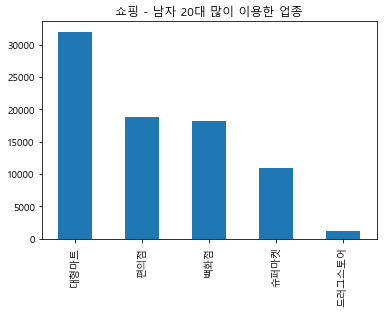

In [549]:
# 남자 연령대별로 많이 이용한 업종
count(M_20, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 남자 20대 많이 이용한 업종')

In [550]:
count(M_30, u'업종')

대형마트      164181
백화점        60771
슈퍼마켓       59524
편의점        41043
드러그스토어      1596
Name: 업종, dtype: int64

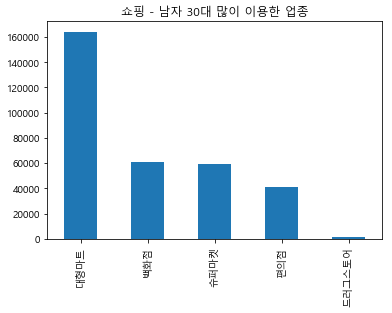

In [551]:
count(M_30, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 남자 30대 많이 이용한 업종')

In [552]:
count(M_40, u'업종')

대형마트      207568
슈퍼마켓       89129
백화점        78480
편의점        35326
드러그스토어      1658
Name: 업종, dtype: int64

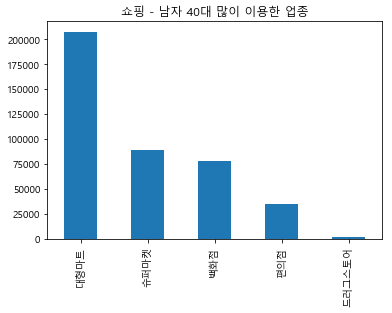

In [553]:
count(M_40, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 남자 40대 많이 이용한 업종')

In [554]:
count(M_50, u'업종')

대형마트      155762
백화점        87677
슈퍼마켓       61833
편의점        10268
드러그스토어      1027
Name: 업종, dtype: int64

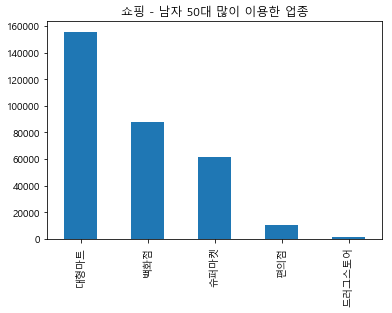

In [555]:
count(M_50, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 남자 50대 많이 이용한 업종')

In [556]:
count(M_60, u'업종')

대형마트      85796
백화점       55326
슈퍼마켓      27709
편의점        2240
드러그스토어      341
Name: 업종, dtype: int64

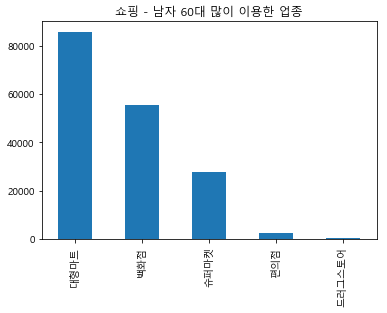

In [557]:
count(M_60, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 남자 60대 많이 이용한 업종')

In [558]:
# 여자 연령대별로 많이 이용한 업종
count(F_20, u'업종')

대형마트      51934
백화점       33952
슈퍼마켓      20357
편의점       10097
드러그스토어     3140
Name: 업종, dtype: int64

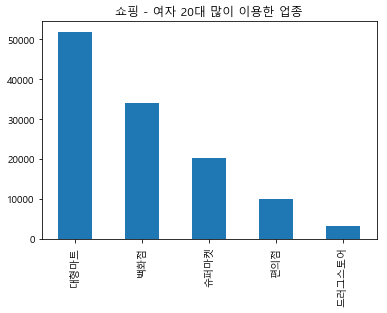

In [559]:
# 여자 연령대별로 많이 이용한 업종
count(F_20, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 여자 20대 많이 이용한 업종')

In [560]:
count(F_30, u'업종')

대형마트      256045
백화점       120463
슈퍼마켓      101633
편의점        33029
드러그스토어      5210
Name: 업종, dtype: int64

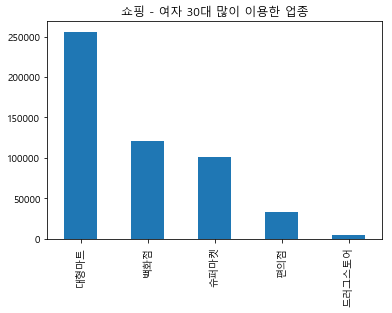

In [561]:
count(F_30, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 여자 30대 많이 이용한 업종')

In [562]:
count(F_40, u'업종')

대형마트      327268
슈퍼마켓      182979
백화점       166230
편의점        30341
드러그스토어      4276
Name: 업종, dtype: int64

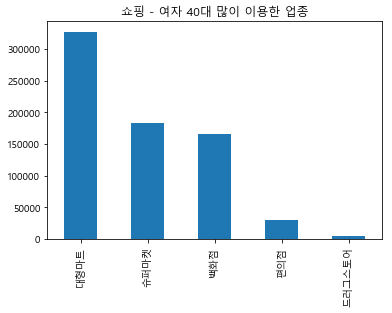

In [563]:
count(F_40, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 여자 40대 많이 이용한 업종')

In [564]:
count(F_50, u'업종')

대형마트      289657
백화점       193622
슈퍼마켓      135336
편의점        18571
드러그스토어      2675
Name: 업종, dtype: int64

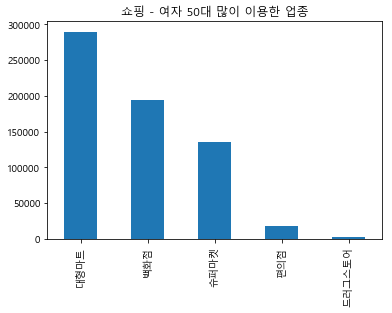

In [565]:
count(F_50, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 여자 50대 많이 이용한 업종')

In [566]:
count(F_60, u'업종')

대형마트      140768
백화점       117949
슈퍼마켓       64896
편의점         5050
드러그스토어      1151
Name: 업종, dtype: int64

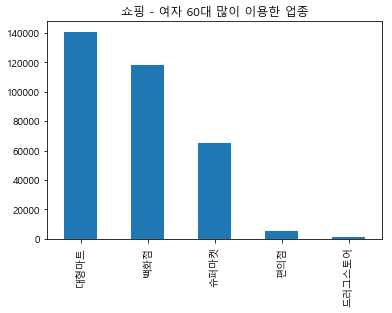

In [567]:
count(F_60, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 여자 60대 많이 이용한 업종')

In [568]:
# 남자+여자 연령대별로 많이 이용한 업종
count(total_20, u'업종')

대형마트      83928
백화점       52195
슈퍼마켓      31249
편의점       28840
드러그스토어     4347
Name: 업종, dtype: int64

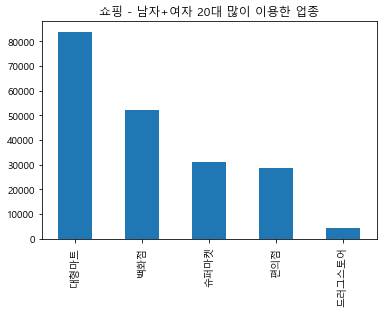

In [569]:
# 남자+여자 연령대별로 많이 이용한 업종
count(total_20, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 남자+여자 20대 많이 이용한 업종')

In [570]:
count(total_30, u'업종')

대형마트      420226
백화점       181234
슈퍼마켓      161157
편의점        74072
드러그스토어      6806
Name: 업종, dtype: int64

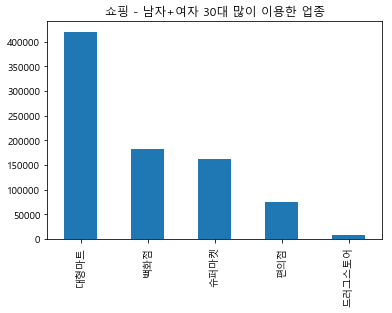

In [571]:
count(total_30, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 남자+여자 30대 많이 이용한 업종')

In [572]:
count(total_40, u'업종')

대형마트      534836
슈퍼마켓      272108
백화점       244710
편의점        65667
드러그스토어      5934
Name: 업종, dtype: int64

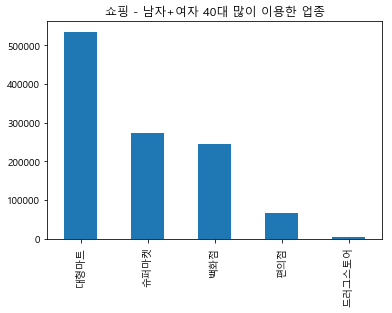

In [573]:
count(total_40, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 남자+여자 40대 많이 이용한 업종')

In [574]:
count(total_50, u'업종')

대형마트      445419
백화점       281299
슈퍼마켓      197169
편의점        28839
드러그스토어      3702
Name: 업종, dtype: int64

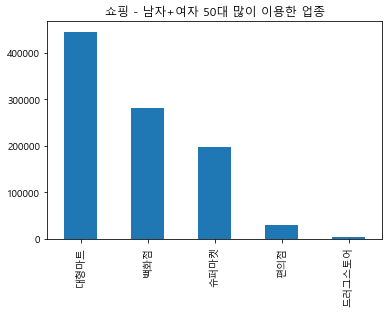

In [575]:
count(total_50, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 남자+여자 50대 많이 이용한 업종')

In [576]:
count(total_60, u'업종')

대형마트      226564
백화점       173275
슈퍼마켓       92605
편의점         7290
드러그스토어      1492
Name: 업종, dtype: int64

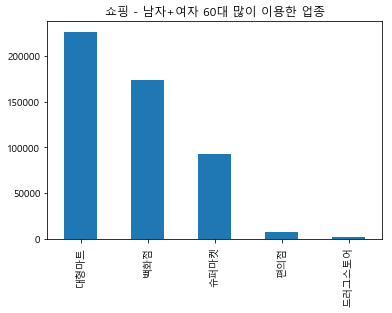

In [577]:
count(total_60, u'업종').plot(kind='bar')
plt.title(u'쇼핑 - 남자+여자 60대 많이 이용한 업종')

In [578]:
## notshopping
# 남자 연령대별로 많이 이용한 업종
count(n_M_20, u'업종')

영화관        3483
패스트푸드      1993
카페         1805
면세점         545
테마파크        471
호텔          144
패밀리레스토랑     103
야구관람         37
여행사           1
Name: 업종, dtype: int64

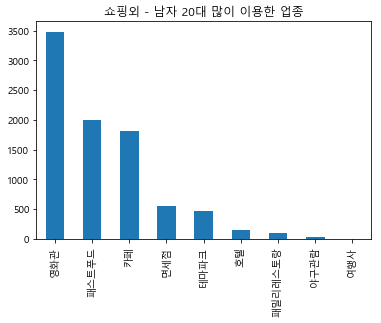

In [579]:
# 남자 연령대별로 많이 이용한 업종
count(n_M_20, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 남자 20대 많이 이용한 업종')

In [580]:
count(n_M_30, u'업종')

영화관        5706
패스트푸드      4478
카페         4122
면세점        1842
테마파크       1320
호텔          396
패밀리레스토랑     354
야구관람         90
여행사           9
Name: 업종, dtype: int64

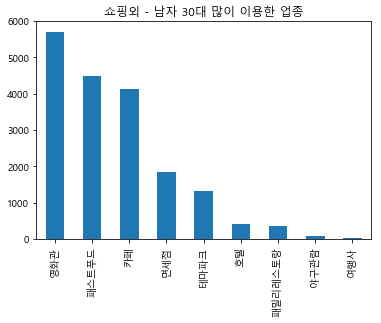

In [581]:
count(n_M_30, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 남자 30대 많이 이용한 업종')

In [582]:
count(n_M_40, u'업종')

영화관        6314
패스트푸드      5512
카페         3839
면세점        1711
테마파크       1521
호텔          527
패밀리레스토랑     384
야구관람         92
여행사          11
Name: 업종, dtype: int64

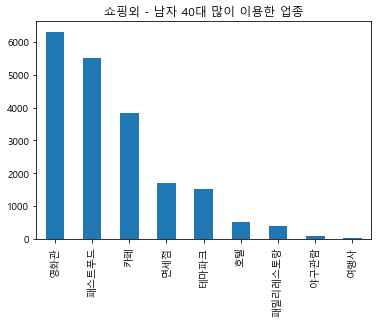

In [583]:
count(n_M_40, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 남자 40대 많이 이용한 업종')

In [584]:
count(n_M_50, u'업종')

영화관        6230
카페         3639
패스트푸드      3247
면세점        1984
테마파크        920
호텔          438
패밀리레스토랑     278
야구관람         55
여행사           2
Name: 업종, dtype: int64

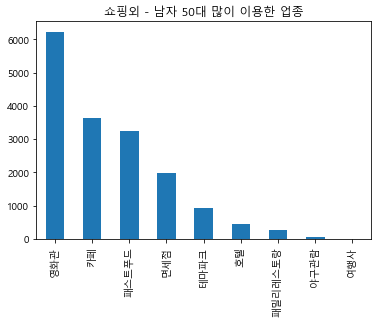

In [585]:
count(n_M_50, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 남자 50대 많이 이용한 업종')

In [586]:
count(n_M_60, u'업종')

영화관        3071
카페         1929
패스트푸드      1746
면세점        1234
테마파크        696
호텔          458
패밀리레스토랑     171
야구관람         25
여행사           2
Name: 업종, dtype: int64

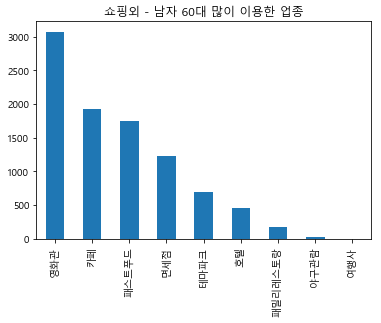

In [587]:
count(n_M_60, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 남자 60대 많이 이용한 업종')

In [588]:
# 여자 연령대별로 많이 이용한 업종
count(n_F_20, u'업종')

영화관        5083
카페         2753
패스트푸드      2489
면세점         991
테마파크        676
패밀리레스토랑     125
호텔           60
야구관람         24
Name: 업종, dtype: int64

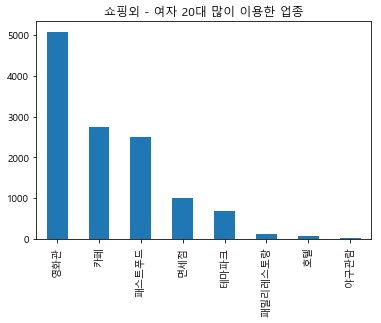

In [589]:
# 여자 연령대별로 많이 이용한 업종
count(n_F_20, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 여자 20대 많이 이용한 업종')

In [590]:
count(n_F_30, u'업종')

영화관        8736
패스트푸드      6958
카페         6341
면세점        2583
테마파크       1982
패밀리레스토랑     558
호텔          379
야구관람         58
여행사          18
Name: 업종, dtype: int64

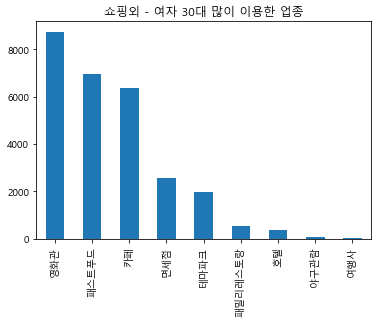

In [591]:
count(n_F_30, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 여자 30대 많이 이용한 업종')

In [592]:
count(n_F_40, u'업종')

영화관        9852
패스트푸드      8696
카페         5611
면세점        2223
테마파크       2191
패밀리레스토랑     482
호텔          460
야구관람         50
여행사           5
Name: 업종, dtype: int64

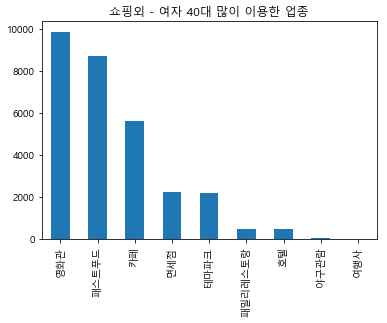

In [593]:
count(n_F_40, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 여자 40대 많이 이용한 업종')

In [594]:
count(n_F_50, u'업종')

영화관        8196
카페         5447
패스트푸드      5190
면세점        2705
테마파크       1634
호텔          492
패밀리레스토랑     407
야구관람         48
여행사          11
Name: 업종, dtype: int64

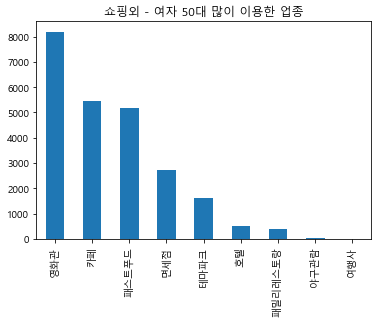

In [595]:
count(n_F_50, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 여자 50대 많이 이용한 업종')

In [596]:
count(n_F_60, u'업종')

영화관        3368
카페         2705
패스트푸드      2448
면세점        1817
테마파크       1185
호텔          403
패밀리레스토랑     250
야구관람         24
여행사          10
Name: 업종, dtype: int64

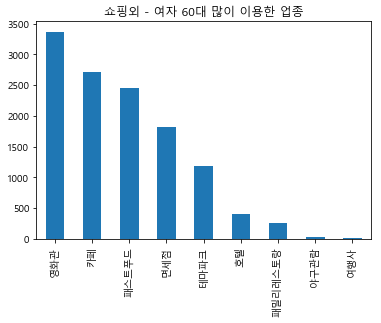

In [597]:
count(n_F_60, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 여자 60대 많이 이용한 업종')

In [598]:
# 남자+여자 연령대별로 많이 이용한 업종
count(n_total_20, u'업종')

영화관        8566
카페         4558
패스트푸드      4482
면세점        1536
테마파크       1147
패밀리레스토랑     228
호텔          204
야구관람         61
여행사           1
Name: 업종, dtype: int64

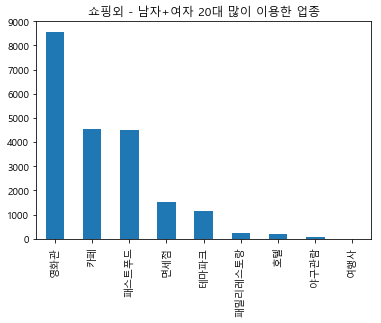

In [599]:
# 남자+여자 연령대별로 많이 이용한 업종
count(n_total_20, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 남자+여자 20대 많이 이용한 업종')

In [600]:
count(n_total_30, u'업종')

영화관        14442
패스트푸드      11436
카페         10463
면세점         4425
테마파크        3302
패밀리레스토랑      912
호텔           775
야구관람         148
여행사           27
Name: 업종, dtype: int64

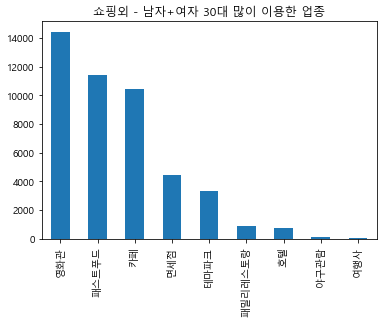

In [601]:
count(n_total_30, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 남자+여자 30대 많이 이용한 업종')

In [602]:
count(n_total_40, u'업종')

영화관        16166
패스트푸드      14208
카페          9450
면세점         3934
테마파크        3712
호텔           987
패밀리레스토랑      866
야구관람         142
여행사           16
Name: 업종, dtype: int64

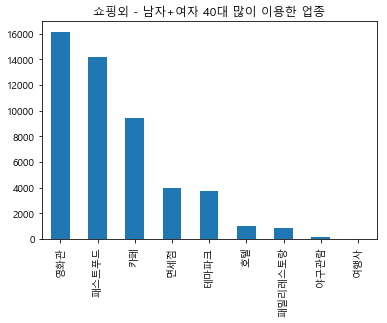

In [603]:
count(n_total_40, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 남자+여자 40대 많이 이용한 업종')

In [604]:
count(n_total_50, u'업종')

영화관        14426
카페          9086
패스트푸드       8437
면세점         4689
테마파크        2554
호텔           930
패밀리레스토랑      685
야구관람         103
여행사           13
Name: 업종, dtype: int64

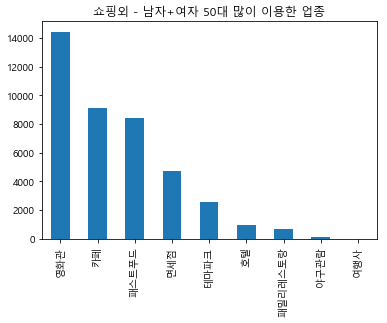

In [605]:
count(n_total_50, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 남자+여자 50대 많이 이용한 업종')

In [606]:
count(n_total_60, u'업종')

영화관        6439
카페         4634
패스트푸드      4194
면세점        3051
테마파크       1881
호텔          861
패밀리레스토랑     421
야구관람         49
여행사          12
Name: 업종, dtype: int64

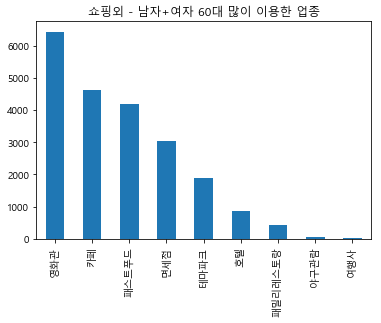

In [607]:
count(n_total_60, u'업종').plot(kind='bar')
plt.title(u'쇼핑외 - 남자+여자 60대 많이 이용한 업종')

### 1. 월별 총 매출액
### 2. 시간대별 총 매출액(shopping만)
-> 그래프들과 같이 (한 화면에 여러개 그래프 그리기)

In [609]:
## 월별 총 매출액
# shopping
shopping_p = shopping.groupby(u'이용월').sum()[u'구매금액']
shopping.groupby(u'이용월').sum()[u'구매금액']

이용월
201501    7234730668
201502    7114202609
201503    7171134603
201504    7427972330
201505    8226190826
201506    6350472575
201507    6882046087
201508    6685597233
201509    7551143035
201510    8497219936
201511    8988656134
201512    8119234294
Name: 구매금액, dtype: int64

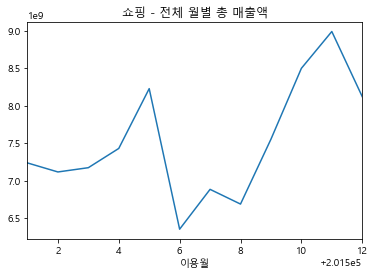

In [617]:
# 그래프
shopping.groupby(u'이용월').sum()[u'구매금액'].plot()
plt.title(u'쇼핑 - 전체 월별 총 매출액')

In [612]:
total_20_p = total_20.groupby(u'이용월').sum()[u'구매금액']
# 대부분 10~12월에 판매금액이 급격히 높아지는 경향이 있는데, 30대남자에서는 그런 경향보이지 않음
total_30_p = total_30.groupby(u'이용월').sum()[u'구매금액']
total_40_p = total_40.groupby(u'이용월').sum()[u'구매금액']
total_50_p = total_50.groupby(u'이용월').sum()[u'구매금액']
total_60_p = total_60.groupby(u'이용월').sum()[u'구매금액']

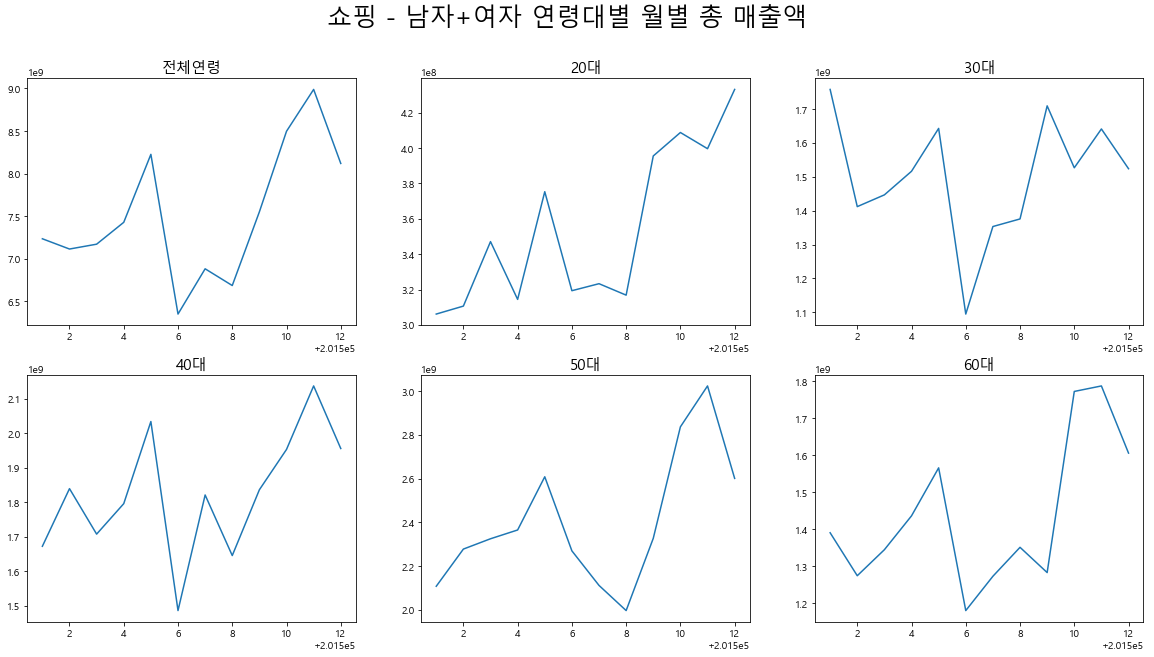

In [613]:
# 각 연령대별 월별 총매출액 경향을 시각화
# 주의할점! 각 그래프의 y축 총매출액은 동일하지 않고 서로 다름 => 각 연령대별의 경향만 보는것으로 사용
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(20,10))
fig.suptitle(u"쇼핑 - 남자+여자 연령대별 월별 총 매출액", fontsize=25)
ax[0, 0].plot(shopping_p)
ax[0, 0].set_title(u"전체연령", fontsize = 15)
#axarr[0, 0].set_title('Axis [0,0] Subtitle')
ax[0, 1].plot(total_20_p)
ax[0, 1].set_title(u"20대", fontsize = 15)
ax[0, 2].plot(total_30_p)
ax[0, 2].set_title(u"30대", fontsize = 15)
ax[1, 0].plot(total_40_p)
ax[1, 0].set_title(u"40대", fontsize = 15)
ax[1, 1].plot(total_50_p)
ax[1, 1].set_title(u"50대", fontsize = 15)
ax[1, 2].plot(total_60_p)
ax[1, 2].set_title(u"60대", fontsize = 15)

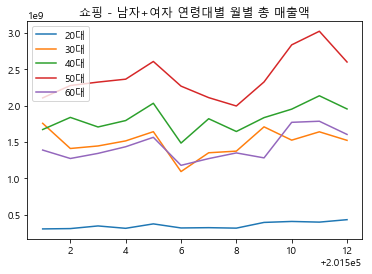

In [618]:
# shopping 남자+여자 연령대별 월별 총 매출액
plt.plot(total_20_p)
plt.plot(total_30_p)
plt.plot(total_40_p)
plt.plot(total_50_p)
plt.plot(total_60_p)
plt.legend([u'20대', u'30대', u'40대', u'50대', u'60대'])
plt.title(u'쇼핑 - 남자+여자 연령대별 월별 총 매출액')

In [619]:
male_p = male.groupby(u'이용월').sum()[u'구매금액']
m_20_p = M_20.groupby(u'이용월').sum()[u'구매금액']
# 대부분 10~12월에 판매금액이 급격히 높아지는 경향이 있는데, 30대남자에서는 그런 경향보이지 않음
m_30_p = M_30.groupby(u'이용월').sum()[u'구매금액']
m_40_p = M_40.groupby(u'이용월').sum()[u'구매금액']
m_50_p = M_50.groupby(u'이용월').sum()[u'구매금액']
m_60_p = M_60.groupby(u'이용월').sum()[u'구매금액']

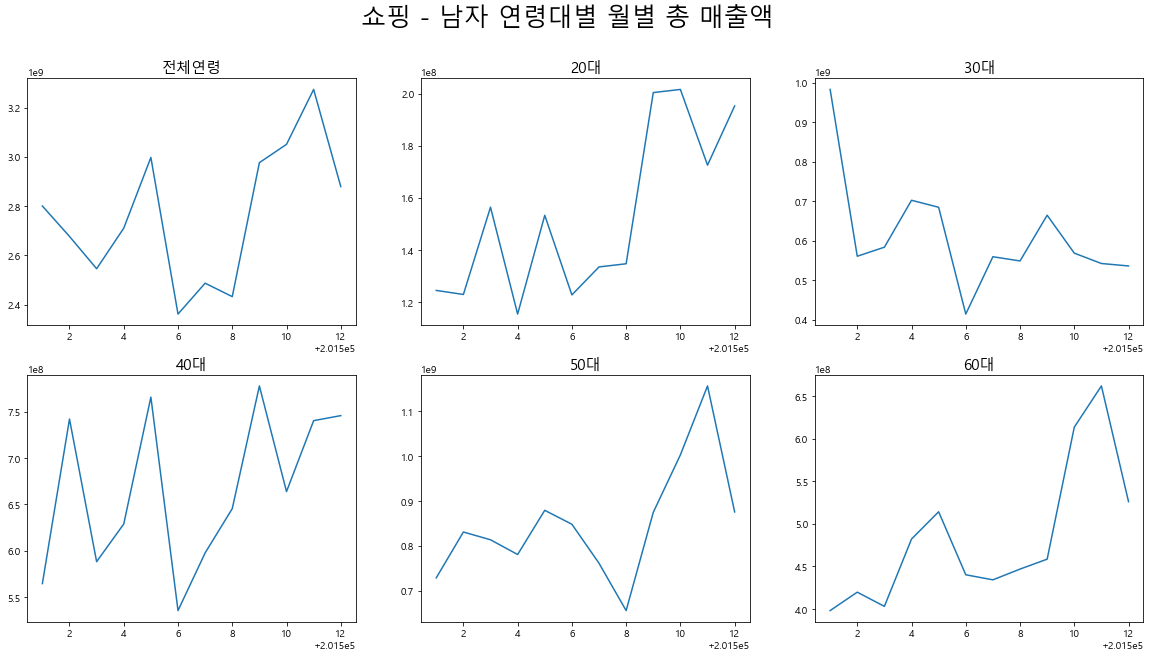

In [620]:
# 각 연령대별 월별 총매출액 경향을 시각화
# 주의할점! 각 그래프의 y축 총매출액은 동일하지 않고 서로 다름 => 각 연령대별의 경향만 보는것으로 사용
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(20,10))
fig.suptitle(u"쇼핑 - 남자 연령대별 월별 총 매출액", fontsize=25)
ax[0, 0].plot(male_p)
ax[0, 0].set_title(u"전체연령", fontsize = 15)
#axarr[0, 0].set_title('Axis [0,0] Subtitle')
ax[0, 1].plot(m_20_p)
ax[0, 1].set_title(u"20대", fontsize = 15)
ax[0, 2].plot(m_30_p)
ax[0, 2].set_title(u"30대", fontsize = 15)
ax[1, 0].plot(m_40_p)
ax[1, 0].set_title(u"40대", fontsize = 15)
ax[1, 1].plot(m_50_p)
ax[1, 1].set_title(u"50대", fontsize = 15)
ax[1, 2].plot(m_60_p)
ax[1, 2].set_title(u"60대", fontsize = 15)

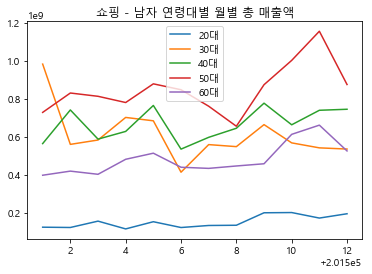

In [621]:
# shopping 남자 연령대별 월별 총 매출액
plt.plot(m_20_p)
plt.plot(m_30_p)
plt.plot(m_40_p)
plt.plot(m_50_p)
plt.plot(m_60_p)
plt.legend([u'20대', u'30대', u'40대', u'50대', u'60대'])
plt.title(u'쇼핑 - 남자 연령대별 월별 총 매출액')

In [622]:
female_p = female.groupby(u'이용월').sum()[u'구매금액']
f_20_p = F_20.groupby(u'이용월').sum()[u'구매금액']
f_30_p = F_30.groupby(u'이용월').sum()[u'구매금액']
f_40_p = F_40.groupby(u'이용월').sum()[u'구매금액']
f_50_p = F_50.groupby(u'이용월').sum()[u'구매금액']
f_60_p = F_60.groupby(u'이용월').sum()[u'구매금액']

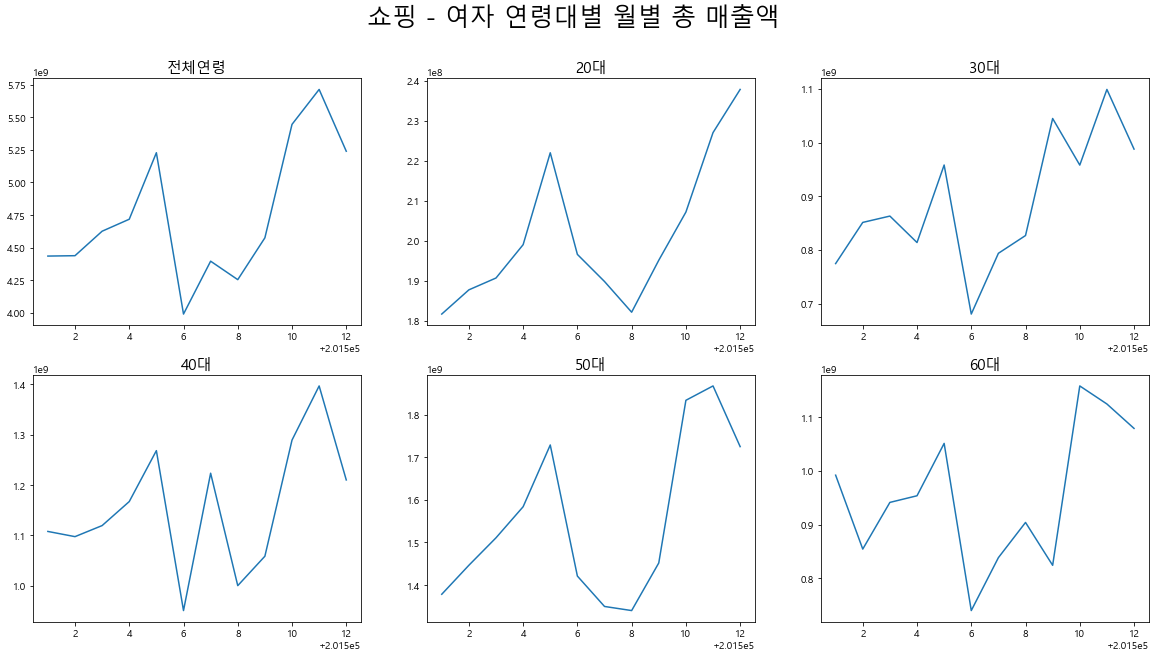

In [623]:
# 각 연령대별 월별 총매출액 경향을 시각화
# 주의할점! 각 그래프의 y축 총매출액은 동일하지 않고 서로 다름 => 각 연령대별의 경향만 보는것으로 사용
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(20,10))
fig.suptitle(u"쇼핑 - 여자 연령대별 월별 총 매출액", fontsize=25)
ax[0, 0].plot(female_p)
ax[0, 0].set_title(u"전체연령", fontsize = 15)
#axarr[0, 0].set_title('Axis [0,0] Subtitle')
ax[0, 1].plot(f_20_p)
ax[0, 1].set_title(u"20대", fontsize = 15)
ax[0, 2].plot(f_30_p)
ax[0, 2].set_title(u"30대", fontsize = 15)
ax[1, 0].plot(f_40_p)
ax[1, 0].set_title(u"40대", fontsize = 15)
ax[1, 1].plot(f_50_p)
ax[1, 1].set_title(u"50대", fontsize = 15)
ax[1, 2].plot(f_60_p)
ax[1, 2].set_title(u"60대", fontsize = 15)

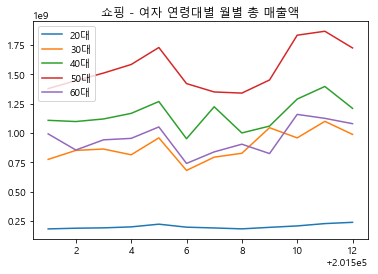

In [624]:
# shopping 여자 연령대별 월별 총 매출액
plt.plot(f_20_p)
plt.plot(f_30_p)
plt.plot(f_40_p)
plt.plot(f_50_p)
plt.plot(f_60_p)
plt.legend([u'20대', u'30대', u'40대', u'50대', u'60대'])
plt.title(u'쇼핑 - 여자 연령대별 월별 총 매출액')

In [625]:
## 월별 총 매출액
# notshopping
notshopping_p = notshopping.groupby(u'이용월').sum()[u'이용금액']
notshopping.groupby(u'이용월').sum()[u'이용금액']

이용월
201501    1085095589
201502     972951286
201503     917870767
201504     999787824
201505    1183584634
201506     881285651
201507    1129817676
201508    1225510237
201509     804054911
201510     975923091
201511     927914467
201512    1071782089
Name: 이용금액, dtype: int64

In [626]:
n_total_20_p = n_total_20.groupby(u'이용월').sum()[u'이용금액']
n_total_30_p = n_total_30.groupby(u'이용월').sum()[u'이용금액']
n_total_40_p = n_total_40.groupby(u'이용월').sum()[u'이용금액']
n_total_50_p = n_total_50.groupby(u'이용월').sum()[u'이용금액']
n_total_60_p = n_total_60.groupby(u'이용월').sum()[u'이용금액']

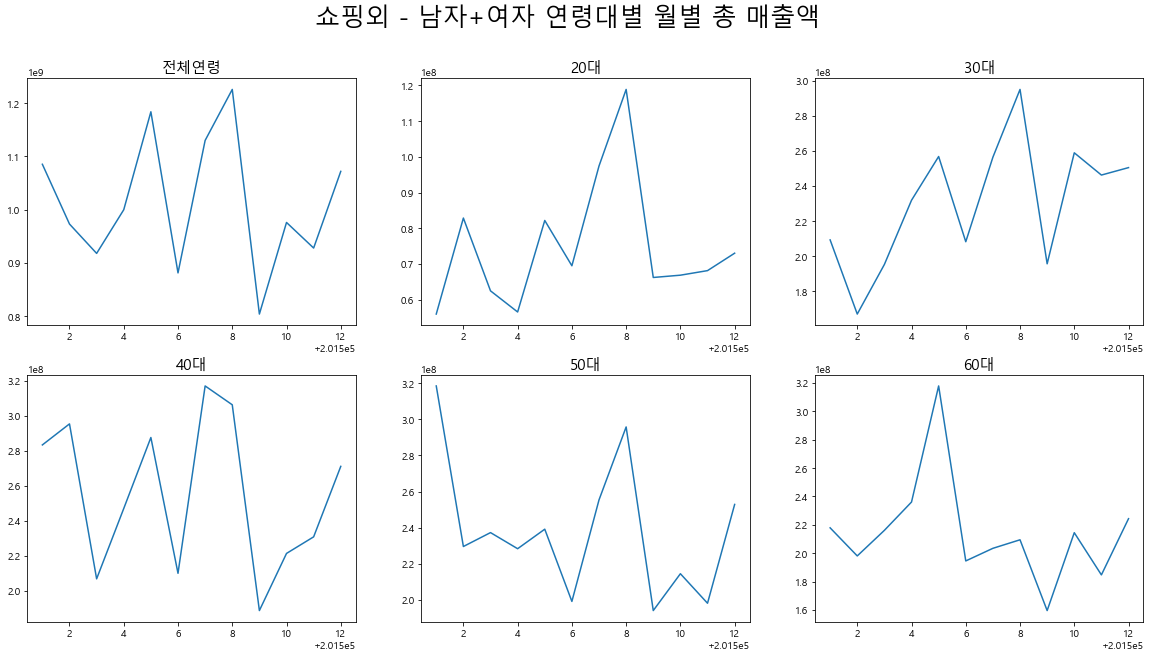

In [627]:
# 각 연령대별 월별 총매출액 경향을 시각화
# 주의할점! 각 그래프의 y축 총매출액은 동일하지 않고 서로 다름 => 각 연령대별의 경향만 보는것으로 사용
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(20,10))
fig.suptitle(u"쇼핑외 - 남자+여자 연령대별 월별 총 매출액", fontsize=25)
ax[0, 0].plot(notshopping_p)
ax[0, 0].set_title(u"전체연령", fontsize = 15)
#axarr[0, 0].set_title('Axis [0,0] Subtitle')
ax[0, 1].plot(n_total_20_p)
ax[0, 1].set_title(u"20대", fontsize = 15)
ax[0, 2].plot(n_total_30_p)
ax[0, 2].set_title(u"30대", fontsize = 15)
ax[1, 0].plot(n_total_40_p)
ax[1, 0].set_title(u"40대", fontsize = 15)
ax[1, 1].plot(n_total_50_p)
ax[1, 1].set_title(u"50대", fontsize = 15)
ax[1, 2].plot(n_total_60_p)
ax[1, 2].set_title(u"60대", fontsize = 15)

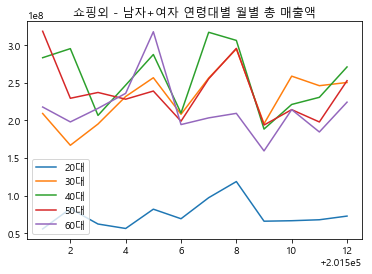

In [631]:
# notshopping 남자+여자 연령대별 월별 총 매출액
plt.plot(n_total_20_p)
plt.plot(n_total_30_p)
plt.plot(n_total_40_p)
plt.plot(n_total_50_p)
plt.plot(n_total_60_p)
plt.legend([u'20대', u'30대', u'40대', u'50대', u'60대'])
plt.title(u'쇼핑외 - 남자+여자 연령대별 월별 총 매출액')

In [629]:
n_male_p = n_male.groupby(u'이용월').sum()[u'이용금액']
n_m_20_p = n_M_20.groupby(u'이용월').sum()[u'이용금액']
n_m_30_p = n_M_30.groupby(u'이용월').sum()[u'이용금액']
n_m_40_p = n_M_40.groupby(u'이용월').sum()[u'이용금액']
n_m_50_p = n_M_50.groupby(u'이용월').sum()[u'이용금액']
n_m_60_p = n_M_60.groupby(u'이용월').sum()[u'이용금액']

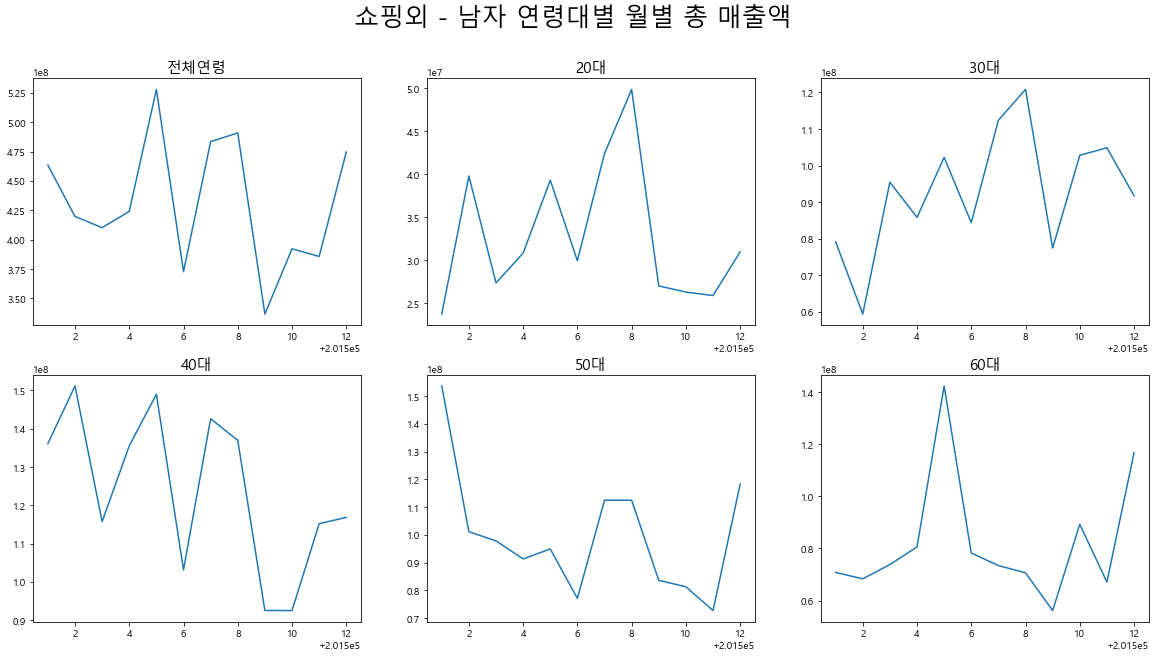

In [630]:
# 각 연령대별 월별 총매출액 경향을 시각화
# 주의할점! 각 그래프의 y축 총매출액은 동일하지 않고 서로 다름 => 각 연령대별의 경향만 보는것으로 사용
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(20,10))
fig.suptitle(u"쇼핑외 - 남자 연령대별 월별 총 매출액", fontsize=25)
ax[0, 0].plot(n_male_p)
ax[0, 0].set_title(u"전체연령", fontsize = 15)
#axarr[0, 0].set_title('Axis [0,0] Subtitle')
ax[0, 1].plot(n_m_20_p)
ax[0, 1].set_title(u"20대", fontsize = 15)
ax[0, 2].plot(n_m_30_p)
ax[0, 2].set_title(u"30대", fontsize = 15)
ax[1, 0].plot(n_m_40_p)
ax[1, 0].set_title(u"40대", fontsize = 15)
ax[1, 1].plot(n_m_50_p)
ax[1, 1].set_title(u"50대", fontsize = 15)
ax[1, 2].plot(n_m_60_p)
ax[1, 2].set_title(u"60대", fontsize = 15)

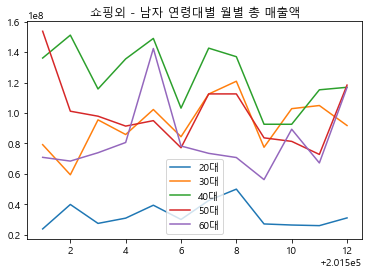

In [636]:
# notshopping 남자 연령대별 월별 총 매출액
plt.plot(n_m_20_p)
plt.plot(n_m_30_p)
plt.plot(n_m_40_p)
plt.plot(n_m_50_p)
plt.plot(n_m_60_p)
plt.legend([u'20대', u'30대', u'40대', u'50대', u'60대'])
plt.title(u'쇼핑외 - 남자 연령대별 월별 총 매출액')

In [633]:
n_female_p = n_female.groupby(u'이용월').sum()[u'이용금액']
n_f_20_p = n_F_20.groupby(u'이용월').sum()[u'이용금액']
n_f_30_p = n_F_30.groupby(u'이용월').sum()[u'이용금액']
n_f_40_p = n_F_40.groupby(u'이용월').sum()[u'이용금액']
n_f_50_p = n_F_50.groupby(u'이용월').sum()[u'이용금액']
n_f_60_p = n_F_60.groupby(u'이용월').sum()[u'이용금액']

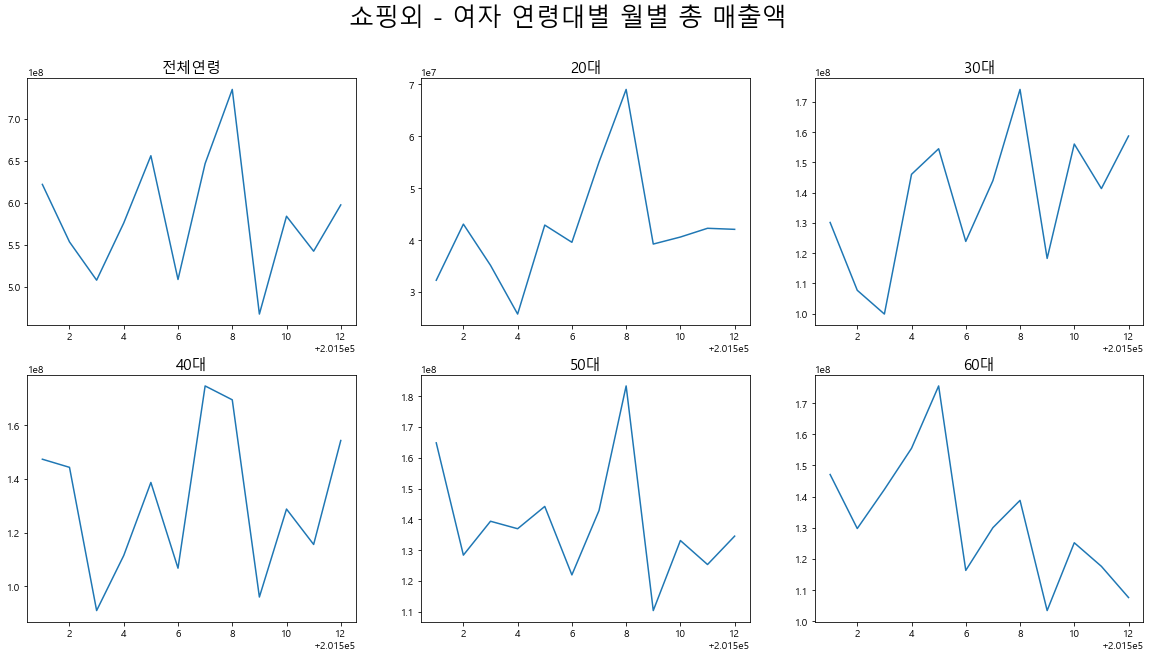

In [634]:
# 각 연령대별 월별 총매출액 경향을 시각화
# 주의할점! 각 그래프의 y축 총매출액은 동일하지 않고 서로 다름 => 각 연령대별의 경향만 보는것으로 사용
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(20,10))
fig.suptitle(u"쇼핑외 - 여자 연령대별 월별 총 매출액", fontsize=25)
ax[0, 0].plot(n_female_p)
ax[0, 0].set_title(u"전체연령", fontsize = 15)
#axarr[0, 0].set_title('Axis [0,0] Subtitle')
ax[0, 1].plot(n_f_20_p)
ax[0, 1].set_title(u"20대", fontsize = 15)
ax[0, 2].plot(n_f_30_p)
ax[0, 2].set_title(u"30대", fontsize = 15)
ax[1, 0].plot(n_f_40_p)
ax[1, 0].set_title(u"40대", fontsize = 15)
ax[1, 1].plot(n_f_50_p)
ax[1, 1].set_title(u"50대", fontsize = 15)
ax[1, 2].plot(n_f_60_p)
ax[1, 2].set_title(u"60대", fontsize = 15)

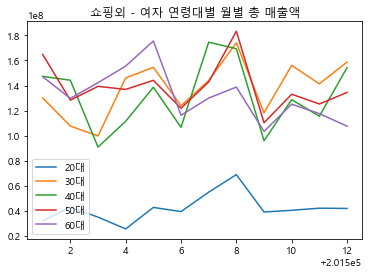

In [637]:
# notshopping 여자 연령대별 월별 총 매출액
plt.plot(n_f_20_p)
plt.plot(n_f_30_p)
plt.plot(n_f_40_p)
plt.plot(n_f_50_p)
plt.plot(n_f_60_p)
plt.legend([u'20대', u'30대', u'40대', u'50대', u'60대'])
plt.title(u'쇼핑외 - 여자 연령대별 월별 총 매출액')

In [473]:
## 시간대별 총 매출액
# shopping
# 남자
male.groupby(u'구매시간').sum()[u'구매금액']

구매시간
0       11444388
1        6092460
2        3309140
3        3202230
4        1481140
5        2090680
6        4007425
7        8004036
8       15053360
9       30658561
10     770514498
11    2211881801
12    2503386657
13    2912852230
14    3431515266
15    3754534769
16    3961201953
17    4071696902
18    3411837164
19    3175691769
20    1866380764
21     630549554
22     303560062
23      98072710
Name: 구매금액, dtype: int64

In [474]:
# 여자
female.groupby(u'구매시간').sum()[u'구매금액']

구매시간
0        7449150
1        3686940
2        2632730
3         967160
4        1027760
5        5663420
6        2705814
7        6208200
8       12671460
9       28470779
10    1284048050
11    3960104305
12    4307288062
13    5098204504
14    6164535696
15    7031790301
16    7241356603
17    6583646195
18    5990564678
19    5114895730
20    2701993693
21     909524890
22     462854116
23     137290575
Name: 구매금액, dtype: int64

In [475]:
# 남자+여자
shopping.groupby(u'구매시간').sum()[u'구매금액']

구매시간
0        18893538
1         9779400
2         5941870
3         4169390
4         2508900
5         7754100
6         6713239
7        14212236
8        27724820
9        59129340
10     2054562548
11     6171986106
12     6810674719
13     8011056734
14     9596050962
15    10786325070
16    11202558556
17    10655343097
18     9402401842
19     8290587499
20     4568374457
21     1540074444
22      766414178
23      235363285
Name: 구매금액, dtype: int64

=> 시간대별 총 매출액 경향(어느 시간대에 주로 구매하나?)은 성별, 나이대별로 크게 다르지 않음

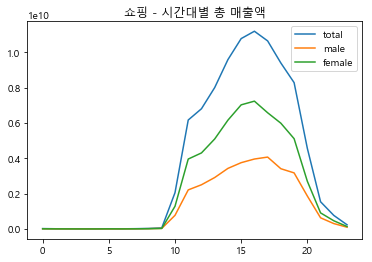

In [638]:
plt.plot(shopping.groupby(u'구매시간').sum()[u'구매금액'], label='total')
plt.plot(male.groupby(u'구매시간').sum()[u'구매금액'], label='male')
plt.plot(female.groupby(u'구매시간').sum()[u'구매금액'], label='female')
plt.legend(['total', 'male', 'female'])
plt.title(u'쇼핑 - 시간대별 총 매출액')